In [1]:
from gwosc.datasets import find_datasets
events = find_datasets(type="event")
print(events)

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200214_224526-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190424_180648-v1', 'GW190425-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v1', 

In [2]:
event_id="GW150914"
from gwosc.datasets import event_gps
gps = event_gps(event_id)
print(gps)

1126259462.4


By default, the `get_event_urls` function returns all of the files associated with a given event, which isn't particularly helpful. However, we can filter any of these by using keayword arguments, for example, to get the URL for the 32-second file for the LIGO-Livingstion detector:

In [3]:
from gwosc.locate import get_event_urls
urls_L1 = get_event_urls(event_id, duration=32, detector = "L1")
print(urls_L1)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


The same thing for Hanford's detector

In [4]:
urls_H1 = get_event_urls(event_id, duration=32, detector="H1")
print(urls_H1)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


We could have chosen any of:

* "G1" - GEO600
* "H1" - LIGO-Hanford
* "L1" - LIGO-Livingston
* "V1" - Virgo

In the future, the Japanese observatory KAGRA will come online with "K1"

## Imports

In [131]:
import os
import urllib
import h5py
import json

# Plotting
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from dataframe_plot import generate_scatter_plot

In [6]:
# Download function
def download(url):
    filename = url.split("/")[-1]
    if not os.path.isfile(filename):
        print(f"Downloading + {url}")
        urllib.request.urlretrieve(url, filename)
        print("File download complete")
    else:
        print("Already downloaded")
    return filename

### Download an HDF5 data file

In [7]:
url = urls_H1[0]
filename_h = download(url)

Already downloaded


In [8]:
url = urls_L1[0]
filename_l = download(url)

Already downloaded


Already downloaded


Text(0, 0.5, 'H1 Strain')

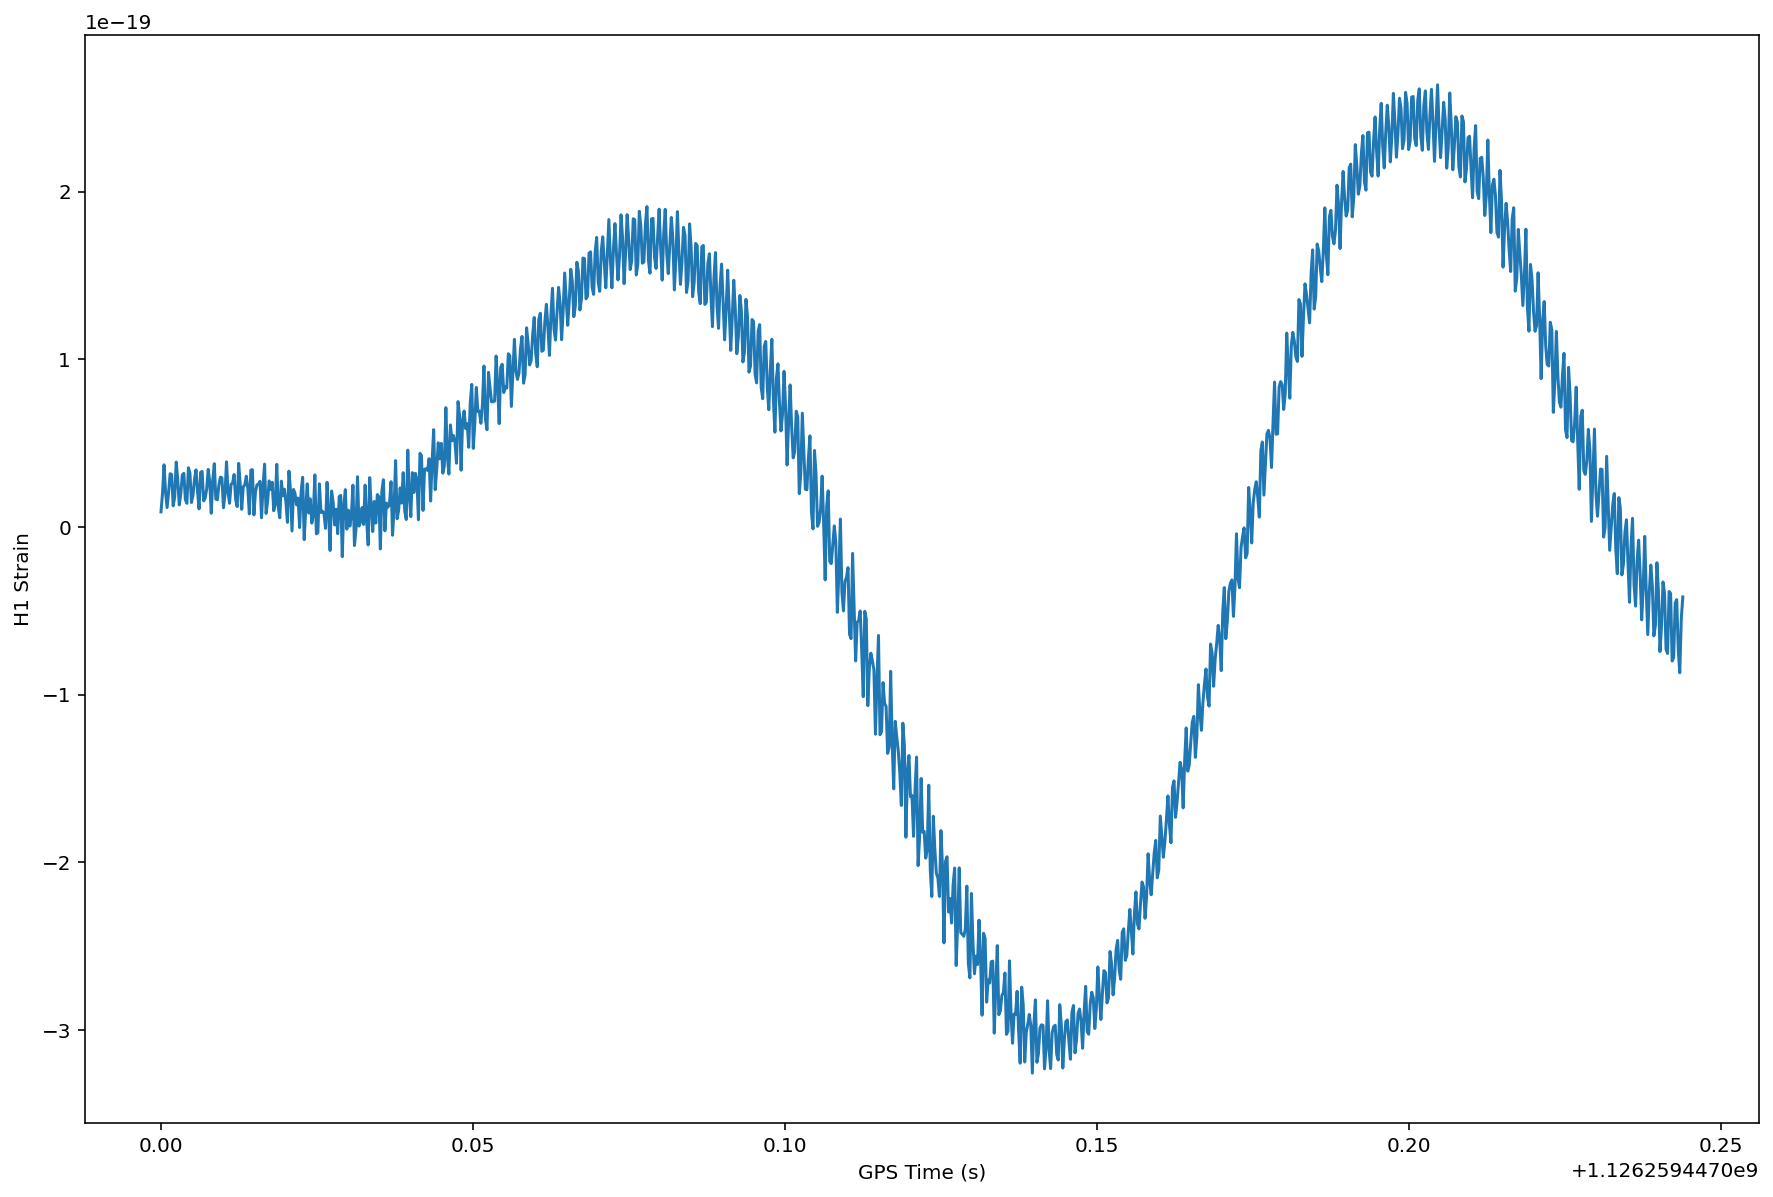

In [9]:

download("https://losc.ligo.org/s/sample_code/readligo.py")
import readligo as rl
# Use the loaddata() method here to load strain data
strain_h, time, dq = rl.loaddata(filename_h, "H1")

# Plot the first 1000 samples fo strain vs. time here
numSamples = 1000
plt.figure(figsize = (15,10))
plt.plot(time[0:numSamples], strain_h[0:numSamples])
plt.xlabel("GPS Time (s)")
plt.ylabel("H1 Strain")

Text(0, 0.5, 'L1 strain')

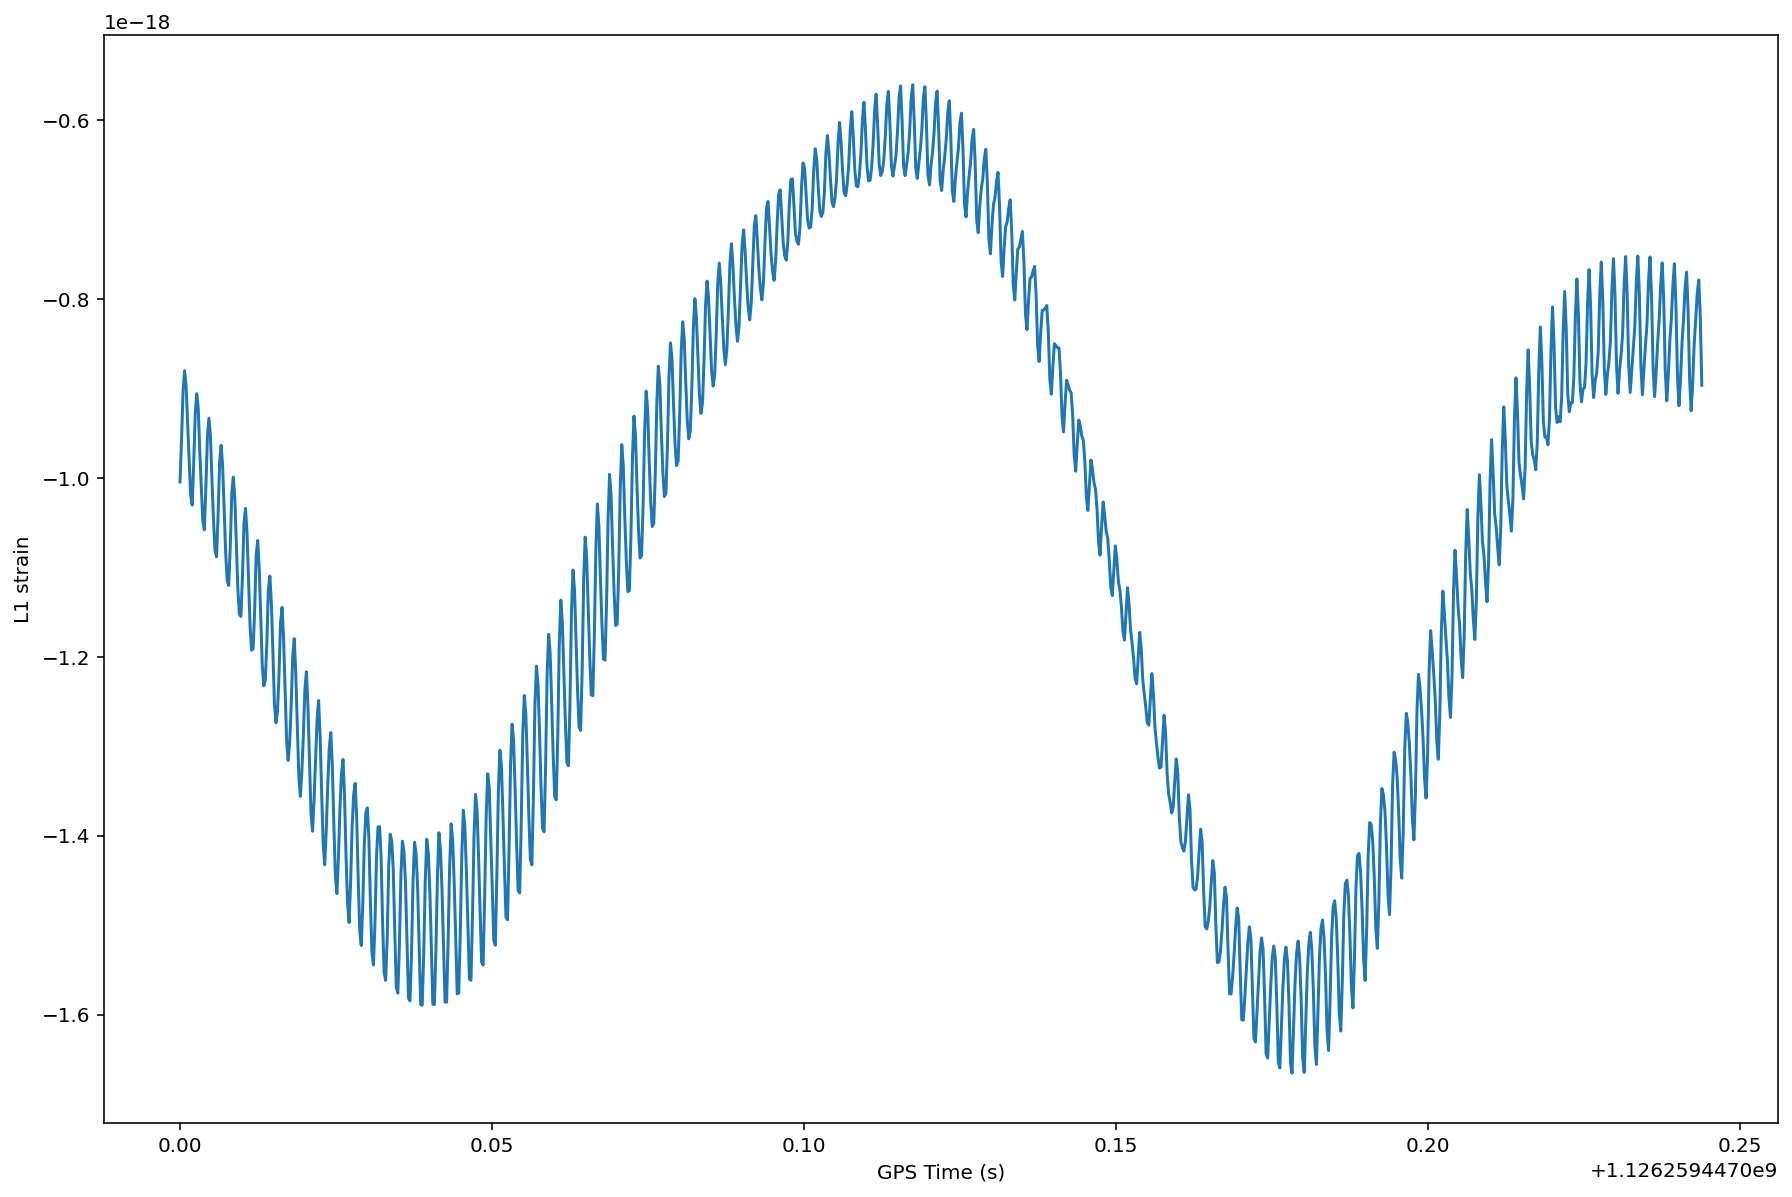

In [10]:
# Use the loaddata() here to load strin data
strain_l, time, dq = rl.loaddata(filename_l, "L1")

# Plot the first 100 samples of strain vs. time here
numSamples = 1000
plt.figure(figsize=(15,10))
plt.plot(time[0:numSamples], strain_l[0:numSamples])
plt.xlabel("GPS Time (s)")
plt.ylabel("L1 strain")

In [11]:
strain_l.shape

(131072,)

In [12]:
import pandas as pd
df = pd.DataFrame(index=time)
df.index.name = "gps_time"
df["L1"]=strain_l
df["H1"]=strain_h
df.head()

L1            H1
gps_time                                
1.126259e+09 -1.004326e-18  9.067309e-21
1.126259e+09 -9.581150e-19  2.011789e-20
1.126259e+09 -9.030594e-19  3.712905e-20
1.126259e+09 -8.800127e-19  2.090712e-20
1.126259e+09 -8.962525e-19  1.159864e-20

In [13]:
filename_l

'L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5'

In [14]:
filename_csv = filename_l.replace("L-L1_","").replace(".hdf5", ".csv")
if not os.path.isfile(filename_csv):
    df.to_csv(filename_csv, header=True, sep=",")

Let's do some plotting with plotly

<AxesSubplot:>

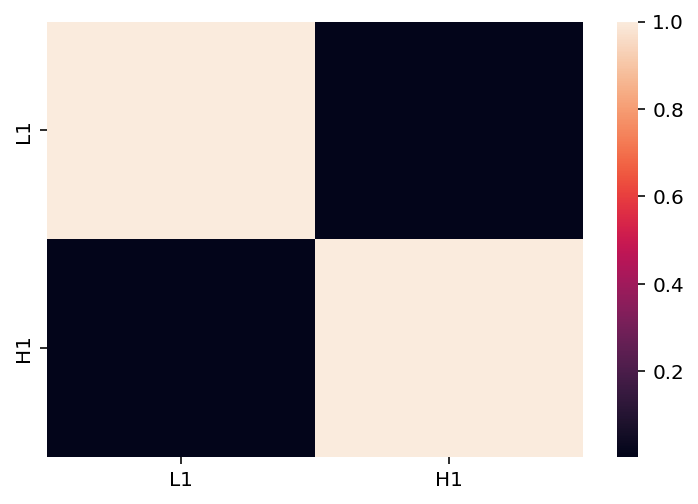

In [15]:
# import chart_study.plotly as py
sns.heatmap(df.corr())

This is the reason why youi wanted me to install all the garbagio modules. I refuse. No correlation or is there???????????????????????????

## Fourier Transoform
examples "borrowed" from [here](https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/).

The Fourier transform is commonly used to convert a signal in the time spectrum to a frequency spectrum. Examples of time spectra are sound wavesm electricity, mechanical vibrations et. The figure below shows 0.25 seconds of Kendrick's tune. As can be seen it looks like a wave with different frequencies. It looks like multiple waves

![alt text denied](https://www.ritchievink.com/img/post-5-fft/fig_1.png "Example of time domain signal captured on a potato")

This is where the Fourier Transformation comes in. This method makes use of the fact that every non-linear function can be represented as a sum of (infinite) sine waves. In the underlying figure this is illustrated, as a step function is simulated my a multitude of sine waves.

![NO ALT TEXT FOR YOU!](https://www.ritchievink.com/img/post-5-fft/fig_2.png "Step function simulated with sine waves")


 A fourier tranform will break apart a time signal and will return information about the frequency of all sine waves needed to simulate that time signal. For sequences of evenly spaced values the Discrete Fourier Transform (DFT) is defined as:
 
 $$X_k = \sum_{n=0}^{N-1}x_n e^{\frac{-2\pi ikn}{N}}$$
 
 Where:
 * $N$ = number of samples
 * $n$ = current sample
 * $x_n$ = value of the signal in sample n
 * $k$ = current frequency (0 Hz to N-1 Hz)
 * $X_k$ = result of the DFT (amplitude and phase)
 
 Note that a dot product is defined as:
 
 $$a \cdot b = \sum_{n=1}^{n}a_ib_i$$


A DFT algorithm can thus be written as:

In [16]:
import numpy as np
def DFT(x):
    """
    Compute the discrete Fourier Transformation of the 1D arrax x
    :param x: (array)
    """
    
    N = x.size
    n = np.arange(N)
    k = n.reshape(N, 1)
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

However if we run this code on our time it takes 256gb of memory for some goddam reason. And apparently it takes 10 seconds to compute. But I wouldn't know because I don't have 256 gb of ram. 

Luckily some clever guys [(Cooley and Tukey)](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) have come up with the Fast Fourier Transform (FFT) algorithm which recursively divides the DFT in smaller DFTs bringing down the needed computation time. A standard DFT scales O($N^2$) while the FFT scales O($N \cdot log(N)$).

### The Discrete Fourier Transform

Let's consider a digital signal $x$ represented by a vector $(x_0, .., x_{N-1})$. We assume that this signal is regularly sampled. The **Discrete Fourier Transform (DFT)** of $x$ is $X = (X_0, .., X(N-1))$ defined as:

$$\forall k \in \{0,\ldots,N-1\}, \quad X_k = \sum_{n=0}^{N-1} x_e^{\frac{-2i\pi kn}{N}}$$.

The  DFT can be computed efficiently with the **Fast Fourier Transform (FFT)**, an algorithm that exploits symmetries and redundancies in this definition to considerably speed up the computation. The complexity of the FFT is $O(N \cdot \log(N))$ instead of $O(N^2)$ for the naive DFT. The FFT is one of the most important algorithms of the digital universe.

Here is an intuitive explanation of what the DFT describes: Instead of representing our signal on a real line, let's represent it on a circle. We can play the whole signal making 1, 2, or any number $k$ of laps on the circle. Therefore, when $k$ is fixed, we represent each value $x_n$ of the signal with an angle $\frac{2 \pi k n}{n}$ and a distance from the original equal to $x_n$.

In the following figure, the signal is a sine wave at the frequency $(f = 3 Hz)$. The points of this signal are in blue, positioned at an angle $\frac{2 \pi k n}{N}$. Their algebraic sum in the complex plane is in red. These vectors represent the different coefficients on the signal's DFT.
![](https://ipython-books.github.io/pages/chapter10_signal/01_fourier_files/fourier.png)

The next figure shows the previous signal's **power spectral density (PSD)**:
![No image is here](https://ipython-books.github.io/pages/chapter10_signal/01_fourier_files/fourier_bis.png)

By considering all possible frequencies, we have an exact representation of our digital signal in the frequency domain. We can recover the initial signal with an **Inverse Fast Fourier Transform** that computes an **Inverse Discrete Fourier Transform**. The Formula is very similar to the DFT:

$$\forall k \in \{0, \ldots, N-1\} \quad x_k = \frac{1}{N} \sum_{n=0} X_n e^{\frac{2i\pi kn}{N}}$$

The DFT is useful when periodic patterns are to be found. However, generally speaking, the Fourier transform cannot detect *transient* changes at specific frequencies. Local spectral models are required, such as the **wavelet transform**.

#### There's more:

The following links contain more details about Fourier transforms:

* [short example](https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example)
* [Introductions to the FFT with SciPy, available at](http://scipy-lectures.github.io/intro/scipy.html#fast-fourier-transforms-scipy-fftpack)
* [Reference Documentation for the fftpack in SciPy](http://docs.scipy.org/doc/scipy/reference/fftpack.html)
* [Fourier Transform on Wikipedia](https://en.wikipedia.org/wiki/Fourier_transform)
* [Discrete Fourier Transform on Wikipedia](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
* [Fast Fourier Transform on Wikipedia](https://en.wikipedia.org/wiki/Fast_Fourier_transform)
* [Decibel on Wikipedia](https://en.wikipedia.org/wiki/Decibel)

### Handling data in the frequency domain using Fourier transform

The Fourier transform is a wiedly-used mathematical tool to expose the frequency-domain content of a time-domain signal, meaning we can see which frequencies contain lots of power and which have less.

We can calculate the Fourier transform of our `TimeSeries` using the `fft()` method:

In [18]:
from gwosc.datasets import event_gps
gps = event_gps(event_id)
frequency_strain = 1./4096
print(gps)

1126259462.4


In [23]:
print(f"We have data around the event: {event_id}, {gps-time[0]:.2f}, {time[-1]:.2f}")

We have data around the event: GW150914, 15.40, 1126259479.00


In [28]:
segment = (int(gps)-5, int(gps))
print(segment)

(1126259457, 1126259462)


Let's do the FFT with GWPy's functions

In [30]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data("H1", *segment, verbose=True, cache=True)
print(hdata)

Fetched 1 URLs from www.gw-openscience.org for [1126259457 .. 1126259462))
Reading data... [Done]
TimeSeries([-3.37408113e-19, -3.60538427e-19, -3.22327735e-19,
            ...,  3.23684383e-20,  3.98040620e-20,
             6.62785937e-20]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


The verbose=True flag lets us see that GWpy has discovered two files (where?) that provide the data for the given interval, downloaded them, and loaded the data. The files are not stored permanently, so the next time you do the same call, it will be downloaded again, however if you know you might repeat the call many times, you can use cache=True to store the file on your computer.

Notes:

To read data from a local file instead of from the GWOSC server, we can use TimeSeries.read() method. We have now downloaded the real LIGO data for GW170817! These are the actual data used in the analysis that discovered the first binary neutron star merger.

To sanity check this, we can easily make a plot using the plot() method of the data TimeSeries

In [31]:
fft = hdata.fft()
print(fft)

FrequencySeries([-2.92640918e-21+0.00000000e+00j,
                  2.04701241e-20+9.86160461e-21j,
                  6.94527281e-22+5.59504013e-21j, ...,
                 -1.78485417e-23-3.69158766e-26j,
                 -1.78374711e-23-1.64605310e-25j,
                 -1.78791153e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.2 Hz,
                epoch: 1126259457.0,
                name: Strain,
                channel: None)


Plotting these data in the Fourier domain gives us an idea of the frequency content of the data. A way to visualize the frequency content of the data is to plot the amplitude spectral density, ASD.

The ASDs are the square root of the power spectral densities (PSDs), which are the averages of the square fo the FFTs of the data.

They are an estimate of the "strain-equivalent noise" of the detectors versus frequency, which limit the ability of the detectors to identify GW signals.

They are in units of $\frac{strain}{rt(Hz)}$. So if you want to know the root-mean-square (rms) strain noise in a frequency band, integrate (sum) the squares of the ASD over that band, then take the square-root.

There's a signal in these data! For the moment, let's ignore that and assume it's all noise.

The result is a FrequencySeries, with a complex amplitude, representing the amplitude and phase of each requency in our data. We can use `abs()` to extract the amplitude and plot that:

C:\Users\apist\anaconda3\envs\g2net-tf\lib\site-packages\gwpy\plot\plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


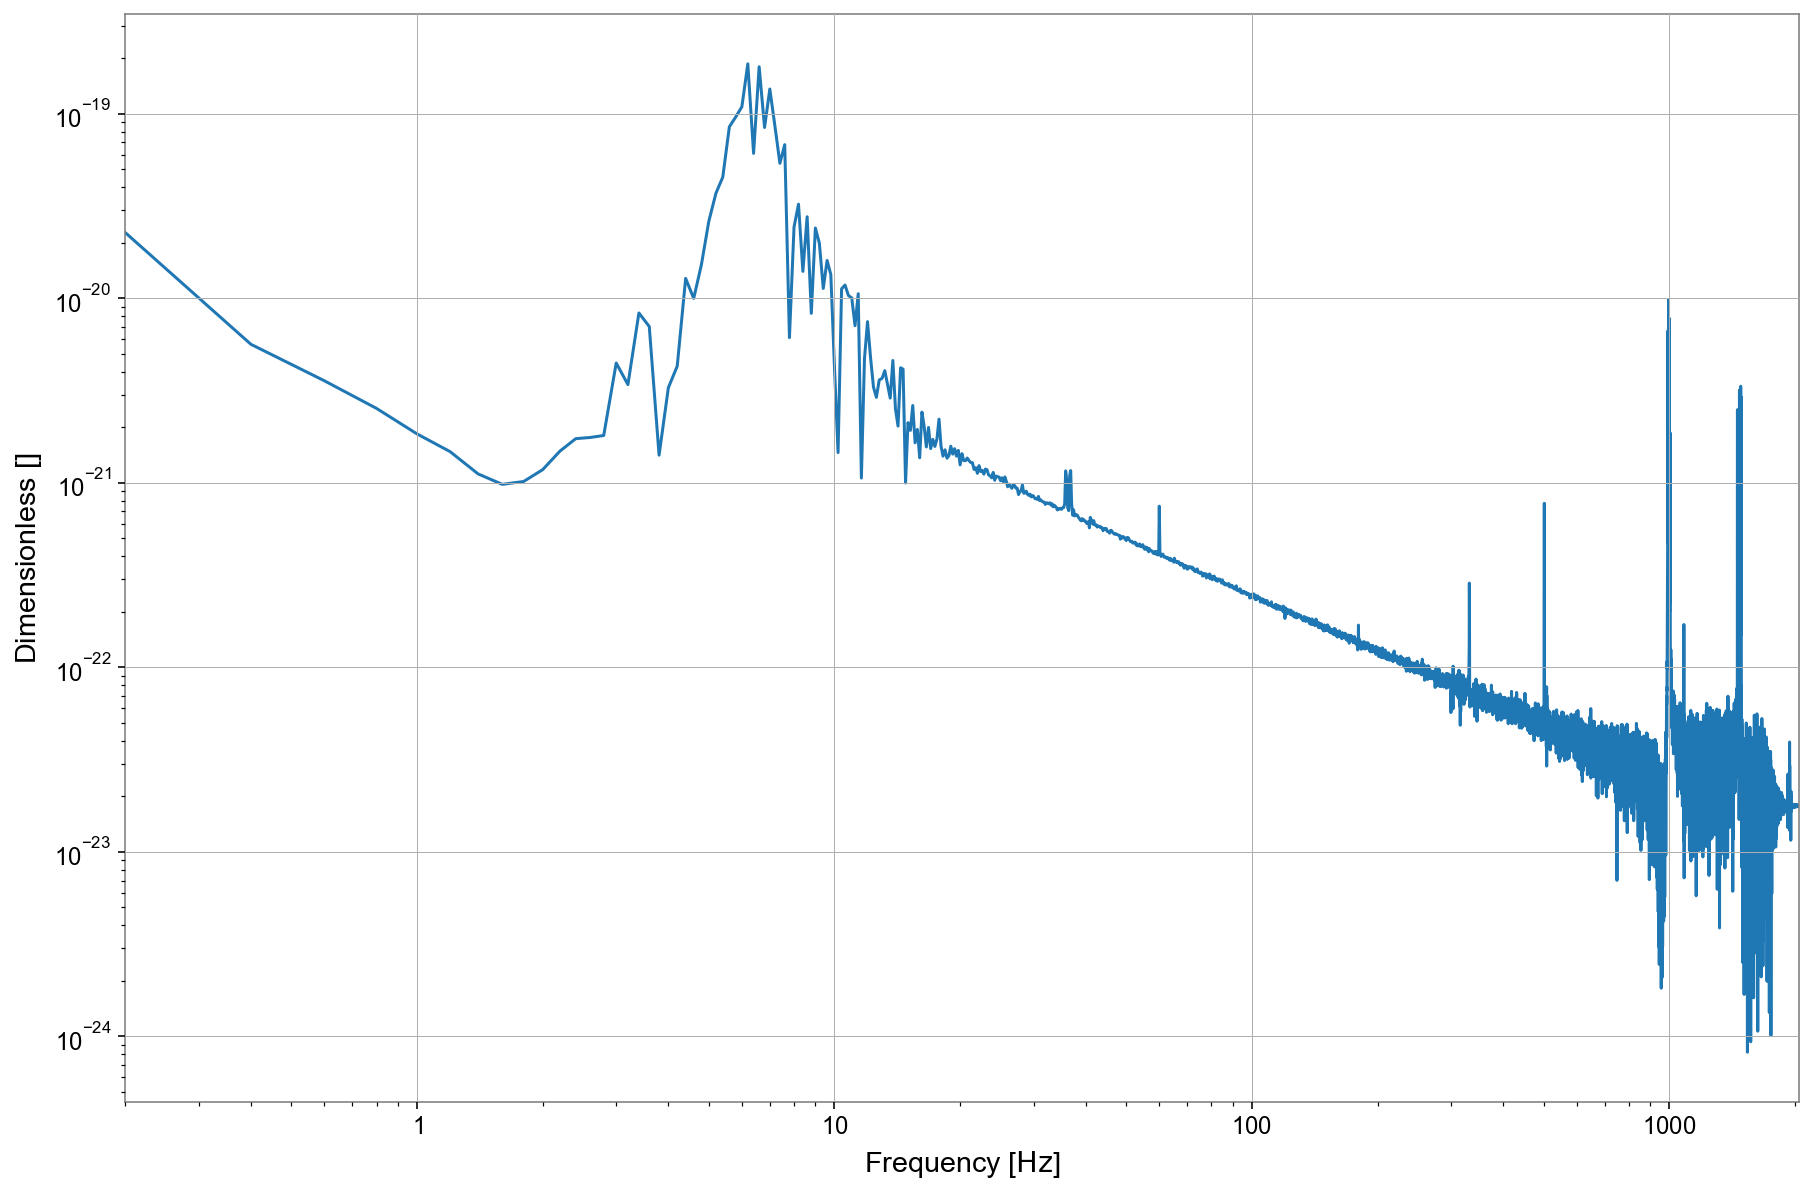

In [39]:
fft_abs = fft.abs()
plot = fft_abs.plot(xscale="log", yscale="log", figsize=(15,10))
plot.show()

Let's make the plot more interactive

In [86]:
def plot_FrequencySeries(list_fft_series):
    if not isinstance(list_fft_series, list):
        list_fft_series=[list_fft_series]
    x = list_fft_series[0].frequencies
    df = pd.DataFrame(index=x)
    df.index.name = "Frequency [Hz]"
    for i, fft_series in enumerate(list_fft_series):
        y=fft_series.value
        df[str(i)]=y
    df.iplot(kind="scatter", xaxis_type="log", yaxis_type="log")



In [87]:
plot_FrequencySeries(fft_abs)

This doesn't look correct at all! The problem is that the FFT works under the assumption that our data are periodic, which means, that the edges of our data look like discontinuities when transformed.

We need to apply a window function to our time-domain data before transforming, which we can do using the `scipy.signal` module.

Windowing minimizes the calculations necessary to implement windowing of fast fourier transform niput data  to reduce spectral leakage.

There are times when we need the FFT of unwindowed time domain data, while at the same time we also want the FFT of that same time-domain data with a window funtion applied.

[More about windowning](https://www.embedded.com/dsp-tricks-frequency-domain-windowing/).

In [88]:
from scipy.signal import get_window
window = get_window("hann", hdata.size)
hwin = hdata * window

In [89]:
print(f"Data shape: {hdata.shape}, Window shape: {window.shape}")

Data shape: (20480,), Window shape: (20480,)


Let's try our transform again and see what we get

In [91]:
fftamp = hwin.fft().abs()
plot_FrequencySeries(fftamp)

This looks a little more like what we expect for the amplitude spectral density of a gravitational-wave detector.

#### Calculating the Power Spectral Density

In practice we typically use a large number of FFTs to estimate an **averages power spectral density** over a long period of data. We can do this using the `asd()` method, which uses [Welch's method](https://en.wikipedia.org/wiki/Welch%27s_method) to combine FFTs of overlapping, windowed chunks of data.

C:\Users\apist\anaconda3\envs\g2net-tf\lib\site-packages\gwpy\plot\plot.py:279: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



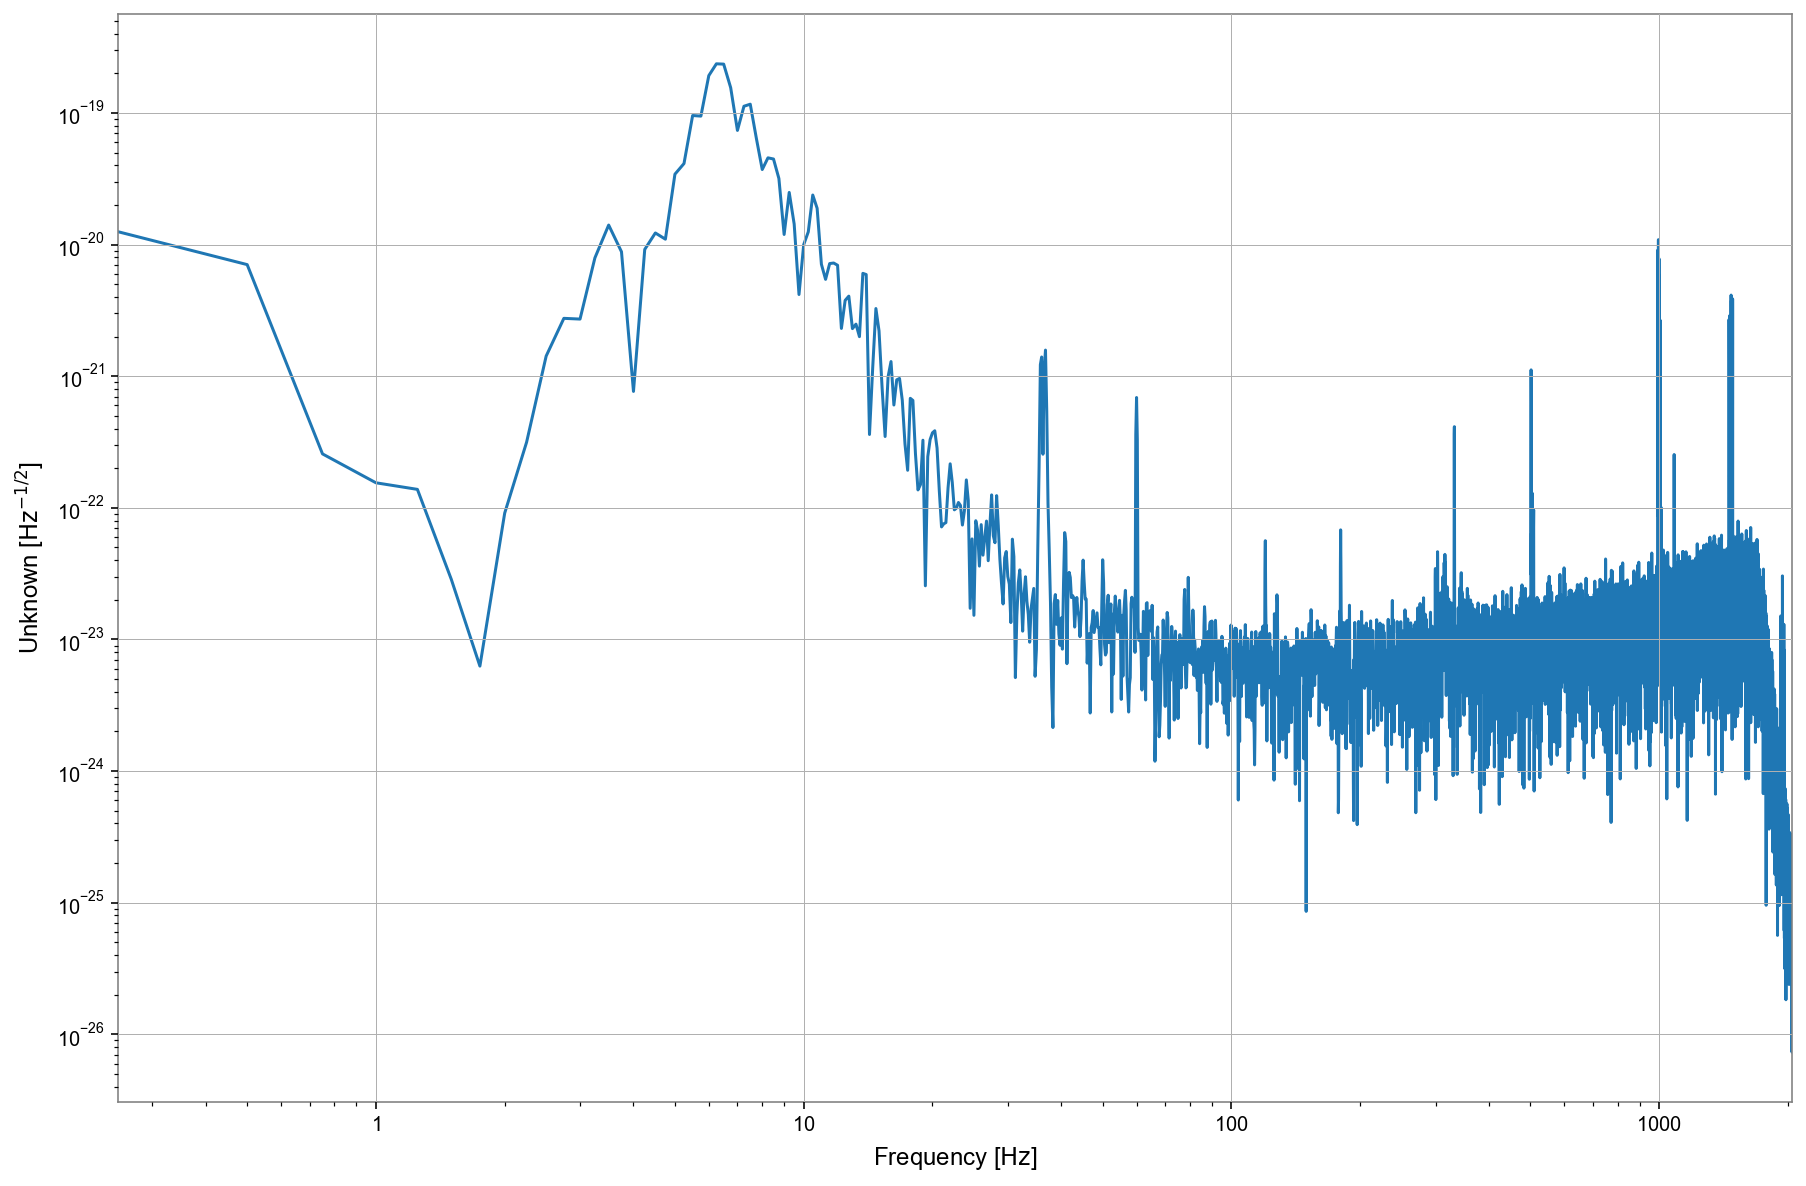

In [94]:
asd = hdata.asd(fftlength=4, method="median")
plot = asd.plot(figsize=(15,10))
plot.show()

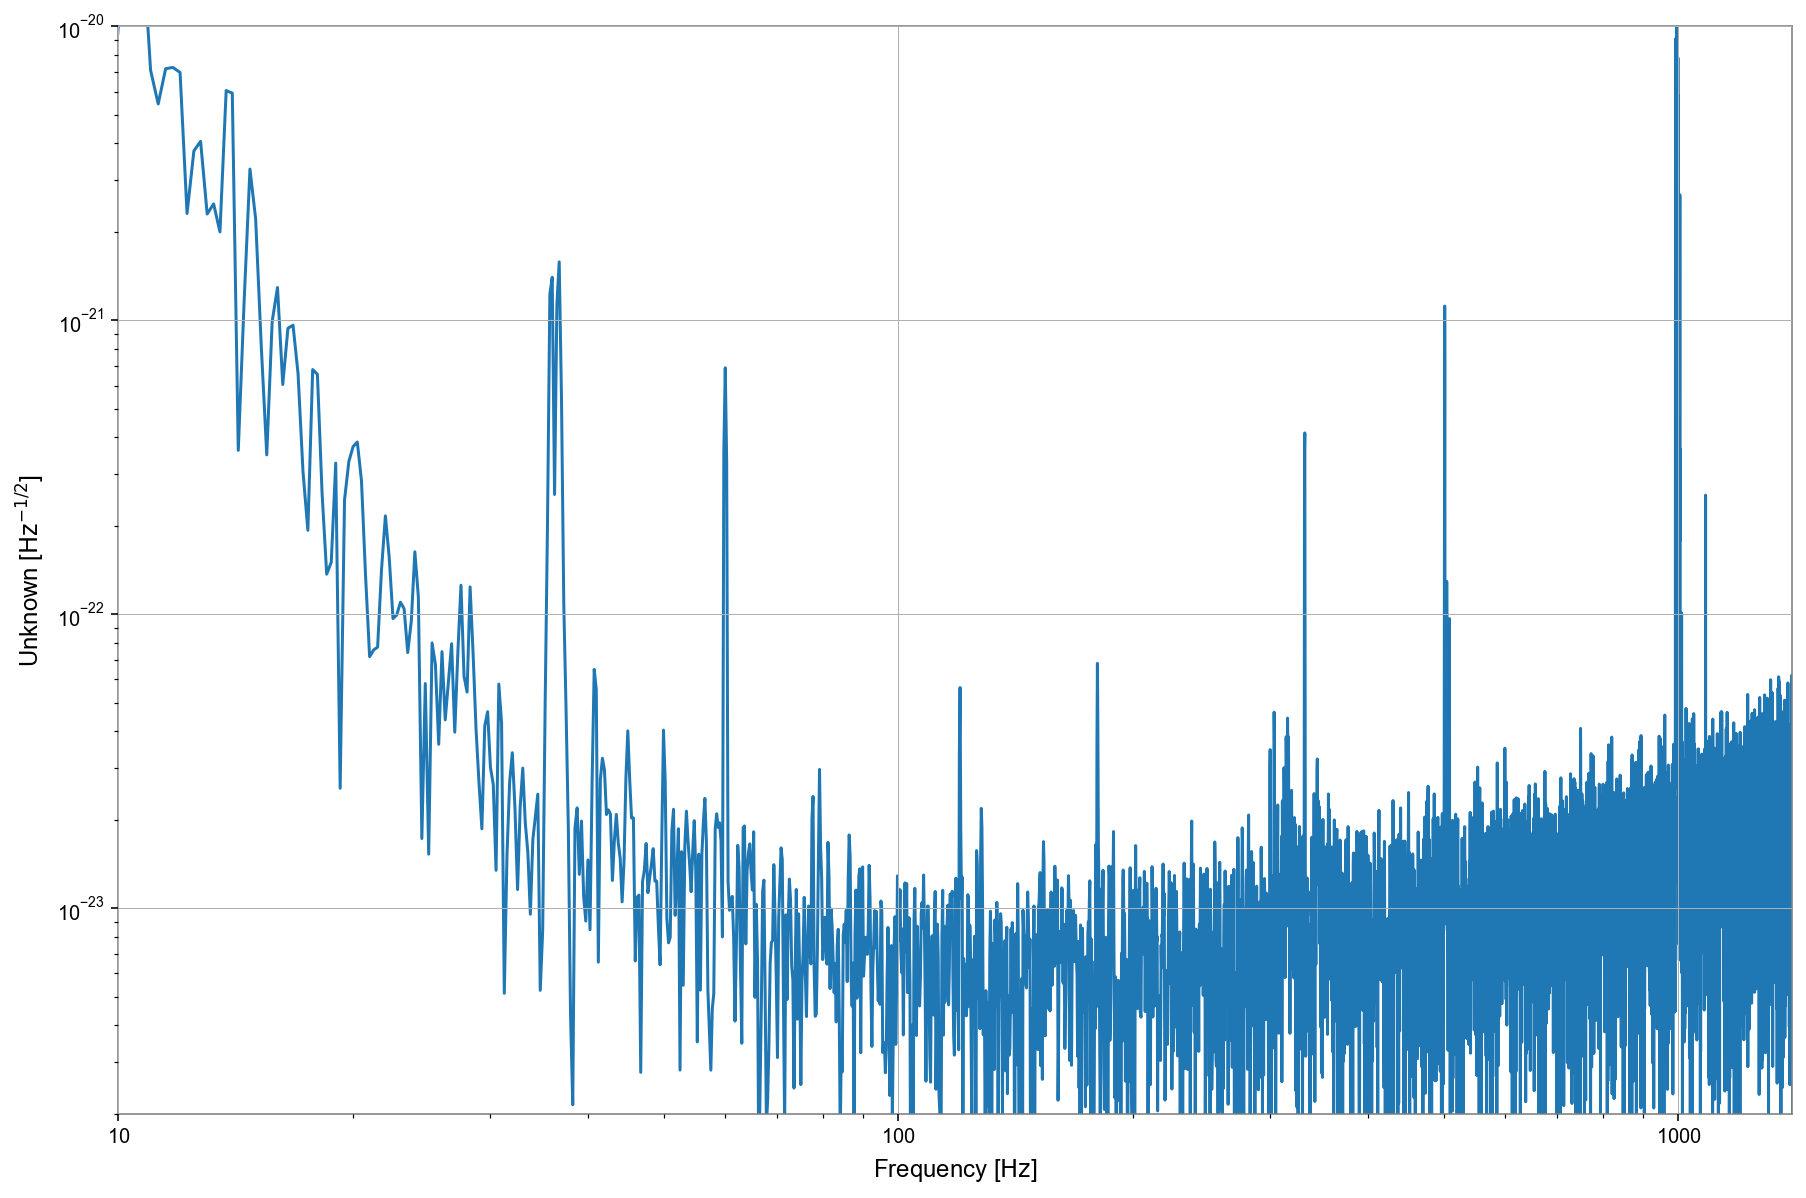

In [96]:
# zoom in on the x axis and y axis to focus on the more dense part
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-24, 1e-20)
plot

or use the interactive plot to look at this

In [97]:
plot_FrequencySeries(asd)

The ASD is a standard tool to study the frequency-domain sensitivity of a gravitational-wave detector. For the LIGO-Hanford data we loaded, we can see large spikes at certain frequencies, including:
* ~330 Hz
* ~500 Hz
* ~1000 Hz

The [O2 spectral lines](https://www.gw-openscience.org/o2speclines/) page on GWOSC describes a number of these spectral features for O2, with some of them being forced upon us, and some being deliberately introduced to help with interferometer control.

Loading more data allows for more FFTs to be averaged during the ASD calculation, meaning random variations get averaged out, and we can see more detail:

In [101]:
hdata2 = TimeSeries.fetch_open_data("H1", int(gps)-512, int(gps)+512, cache=True)
hasd2 = hdata2.asd(fftlength=4, method="median")
plot_FrequencySeries(hasd2)

Now we can see more features, includings sets of lines around ~30 Hz and ~65 Hz ando some more isolated lines through the more sensitive region. For comparison, we can load the LIGO-Livingston data and plot that as well:

In [103]:
# get Livingston data
ldata2 = TimeSeries.fetch_open_data("L1", int(gps)-512, int(gps)+512, cache=True, verbose=True)
lasd2 = ldata2.asd(fftlength=4, method="median")


plot_FrequencySeries([hasd2, lasd2])

Fetched 1 URLs from www.gw-openscience.org for [1126258950 .. 1126259974))
Reading data... [Done]


blue: Livingston

orange: Handford

In [107]:
x = lasd2.frequencies
df = pd.DataFrame(index=x)
df.index.name="Frequency [Hz]"
df["LIGO-Handford"] = hasd2.value
df["LIGO-Livingston"] = lasd2.value
df.iplot(kind="scatter", xaxis_type="log", yaxis_type="log",
         yaxis_title=r"Strain noise [$\frac{1}{\sqrt{\mathrm{Hz}}}$]",
        xaxis_title = r"Frequency [Hz]")

Now we can see clearly the relative sensitivity of each LIGO instrument, the common features between both, and those unique to each observatory. Remember the cross-correlation chart saying the data is so different. Not so different after all...

In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
%reload_ext autoreload

Read the event properties from a local json file (download in advance)

In [116]:
fnjson = "BBH_events_v3.json"
try:
    events = json.load(open(fnjson, "r"))
except IOError:
    print(f"Cannot find resource file {fnjson}")
    print(f"You can download it from https://losc.ligo.org/s/events/{fnjson}")
    print("Quitting")
    quit()
    
# did the user select the eventname ?
try:
    events[event_id]
except:
    print(f"You must select an eventname that is in {fnjson}! Quitting.")
    quit()


In [119]:
# Extract the parameters for the desired event:
event = events[event_id]
fn_H1 = event["fn_H1"] # File name for H1 data
fn_L1 = event["fn_L1"] # File name for L1 data
fn_template = event["fn_template"] # file name for template waveform
fs = event["fs"] # set sampling rate
tevent = event["tevent"] # set the approximate event GPS time
fband = event["fband"] # frequency band for bandpassing signal
print(f"Reading in the parameters for event {event['name']}")
print(event)

Reading in the parameters for event GW150914
{'name': 'GW150914', 'fn_H1': 'H-H1_LOSC_4_V2-1126259446-32.hdf5', 'fn_L1': 'L-L1_LOSC_4_V2-1126259446-32.hdf5', 'fn_template': 'GW150914_4_template.hdf5', 'fs': 4096, 'tevent': 1126259462.44, 'utcevent': '2015-09-14T09:50:45.44', 'm1': 41.743, 'm2': 29.237, 'a1': 0.355, 'a2': -0.769, 'approx': 'lalsim.SEOBNRv2', 'fband': [43.0, 300.0], 'f_min': 10.0}


In [120]:
from scipy.signal import butter, lfilter, freqz

Let's keep a dataframe with the original signal and the filtered versions of it

In [123]:
df_fil = pd.DataFrame(index=time)
df_fil.index.name = "gps_time"
df_fil["L1"] = strain_l
df_fil["H1"] = strain_h

Simple Moving Average Filtering (Running Mean)

More applications here:
- https://gordoncluster.wordpress.com/2014/02/13/python-numpy-how-to-generate-moving-averages-efficiently-part-2/
- https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
- https://stackoverflow.com/questions/13728392/moving-average-or-running-mean

In [124]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, "valid")
    sma = [values[0]]*(window-1)+sma.tolist()
    return sma

for ordr in [5,10,15,50]:
    strain_l_mva = movingaverage(strain_l, window=ordr)
    strain_h_mva = movingaverage(strain_h, window=ordr)
    df_fil[f"L1_mva_{ordr}"] = strain_l_mva
    df_fil[f"H1_mva_{ordr}"] = strain_h_mva

In [133]:
filename_html = filename_csv.replace(".csv",".html")
generate_scatter_plot(df_fil, df_fil.columns, filename_html, mode="lines")

statistical functions for extracting features from time domain

In [ ]:
def percentiles_all(x, iqr=True, amplitude=True, percentile_list=[5,10,25,40,50,60,75,90,95]):
    names = [f"p_{p}" for p in percentiles_list]
    if iqr and 25 in percentiles_list and 75 in percentiles_list:
        names.append("iqr")
    if amplitude and 1 in percentiles_list and 99 in percentiles_list:
        names.append("perc_amp")
    if len(x) == 0:
        values = [0 for i in range(len(names))]
        return values, names
    if len(percentiles_list) > 0 and all([0 < q < 100 for q  in percentiles_list]):
        values = list(np.percentile(x, percentiles_list))
    else:
        values = []
    if iqr:
        q1 = percentiles_list.index(25)
        q3 = percentiles_list.index(75)
        values.append(values[q3] - values[q1])
    if amplitude and 1 in percentiles_list and 99 in percentiles_list:
        q1 = percentiles_list.index(1)
        q3 = percentiels_list.index(99)
        values.append(valuse[q3] - values[q1])
    return values, names

def stats_calculate_all(x):
    stats_all_names = ['len', 'min', 'max', 'range', 'mean', 'hmean', 'gmean', 'var', 'std', 'skew', 'kurtosis',
                       'median', 'mode', 'energy', 'energy_sample', 'snr']

    xnp = np.array(x)
    n = len(x)
    if n == 0:
        values = [0 for i in range(len(stats_all_names))]
        return values, stats_all_names
    values = [n]
    vmin = float(min(xnp))
    if vmin < 1:
        offset = 1 + abs(vmin)
    else:
        offset = 0
    vmax = float(max(xnp))
    vrange = vmax - vmin
    vmean = float(np.mean(xnp))
    vstd = float(np.std(xnp))
    venergy = float(sum(np.array(xnp) ** 2))
    venergy_sample = venergy / n
    snr = 0.0
    if vstd != 0:
        snr = vmean / vstd
    values.append(vmin)
    values.append(vmax)
    values.append(vrange)
    values.append(vmean)
    values.append(float(sp.hmean(xnp + offset)))
    values.append(float(sp.gmean(xnp + offset)))
    values.append(vstd ** 2)
    values.append(vstd)
    values.append(sp.skew(xnp))
    values.append(sp.kurtosis(xnp))
    values.append(np.median(xnp))
    vmode = sp.mode(xnp)
    vmode = float(vmode[0][0])
    values.append(vmode)
    values.append(venergy)
    values.append(venergy_sample)
    values.append(snr)
    return values, stats_all_names